In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
df = pd.DataFrame(
        {"Actual Sales" : [5384, 8081, 10282, 9156, 6118, 9139, 12460, 10717, 7825, 9693, 15177, 10990]},
        index = range(1,13))
df.head(16)

,Actual Sales
1,5384
2,8081
3,10282
4,9156
5,6118
6,9139
7,12460
8,10717
9,7825
10,9693


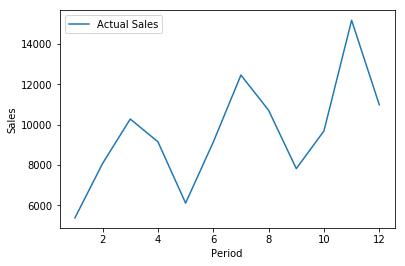

In [3]:
ax = df.plot(kind='line')
ax.set_xlabel("Period")
ax.set_ylabel("Sales")
plt.show()

In [4]:
m_average = [np.nan, np.nan, np.nan]
sales = df['Actual Sales']
for i in range(len(sales)):
    subsection = sales[i:i+3]
    m_average.append(sum(subsection)/len(subsection))
#     for j in range(1, 4):
#         index = i+j
#         if(index < 16 and not np.isnan(sales[index])):
#             subsection.append(sales[index])
#     if(len(subsection) > 0):
#         m_average.append(sum(subsection)/len(subsection))
    
len(m_average)
df2 = pd.DataFrame(
        {"Moving Average" : m_average},
        index = range(1,16))
df2.head(16)
# df["3-MA"] = m_average
# df.head(16)
# plt.plot(range(1,16), m_average)
# plt.show()

,Moving Average
1,NaN
2,NaN
3,NaN
4,7915.666667
5,9173.000000
6,8518.666667
7,8137.666667
8,9239.000000
9,10772.000000
10,10334.000000


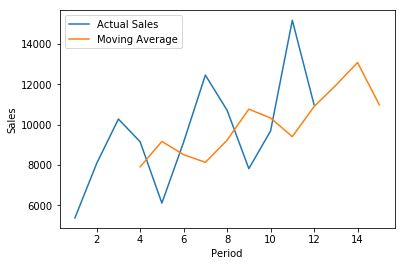

In [5]:
result = pd.concat([df, df2], axis=1, sort=False)
ax = result.plot(kind='line')
ax.set_xlabel("Period")
ax.set_ylabel("Sales")
plt.show()

In [6]:
sales = df['Actual Sales']
last_forecast = sales[1]
exp_smoothing = [last_forecast]
a = 0.2
for i in range(len(sales)):
    last_forecast = a*sales[i+1]+(1-a)*last_forecast
    exp_smoothing.append(last_forecast)
    
print(exp_smoothing)
df2 = pd.DataFrame(
        {"a = 0.2" : exp_smoothing},
        index = range(1,14))
df2.head(16)

[5384, 5384.0, 5923.4, 6795.120000000001, 7267.296000000001, 7037.436800000001, 7457.749440000001, 8458.199552000002, 8909.959641600002, 8692.967713280002, 8892.974170624002, 10149.779336499201, 10317.82346919936]


,a = 0.2
1,5384.000000
2,5384.000000
3,5923.400000
4,6795.120000
5,7267.296000
6,7037.436800
7,7457.749440
8,8458.199552
9,8909.959642
10,8692.967713


In [7]:
last_forecast = sales[1]
exp_smoothing = [last_forecast]
a = 0.8
for i in range(len(sales)):
    last_forecast = a*sales[i+1]+(1-a)*last_forecast
    exp_smoothing.append(last_forecast)
    
print(exp_smoothing)
df3 = pd.DataFrame(
        {"a = 0.8" : exp_smoothing},
        index = range(1,14))
df3.head(16)

[5384, 5384.0, 7541.6, 9733.92, 9271.583999999999, 6748.7168, 8660.943360000001, 11700.188672, 10913.6377344, 8442.72754688, 9442.945509376, 14030.1891018752, 11598.037820375039]


,a = 0.8
1,5384.000000
2,5384.000000
3,7541.600000
4,9733.920000
5,9271.584000
6,6748.716800
7,8660.943360
8,11700.188672
9,10913.637734
10,8442.727547


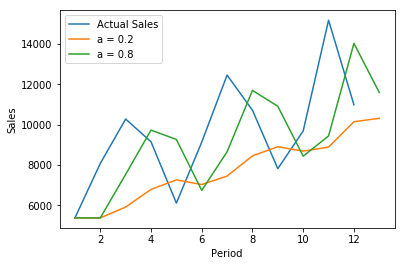

In [8]:
result = pd.concat([df, df2, df3], axis=1, sort=False)
ax = result.plot(kind='line')
ax.set_xlabel("Period")
ax.set_ylabel("Sales")
plt.show()

In [20]:
season = np.array([1, 2, 3])
s1_avg = sum(sales[0:4])/len(sales[0:4])
s2_avg = sum(sales[4:8])/len(sales[4:8])
s3_avg = sum(sales[8:12])/len(sales[8:12])
total_avg = sum(sales)/len(sales)

avg_arr = np.array([s1_avg, s2_avg, s3_avg])

fit = np.polyfit(season, avg_arr, 3)
poly = np.poly1d(fit)
average_predict = poly(4)

index1 = (sales[1]/s1_avg + sales[5]/s2_avg + sales[9]/s3_avg)/3
index2 = (sales[2]/s1_avg + sales[6]/s2_avg + sales[10]/s3_avg)/3
index3 = (sales[3]/s1_avg + sales[7]/s2_avg + sales[11]/s3_avg)/3
index4 = (sales[4]/s1_avg + sales[8]/s2_avg + sales[12]/s3_avg)/3

predict = [average_predict*index1, average_predict*index2, average_predict*index3, average_predict*index4]
print(predict)

[8056.975954760942, 11320.795658709518, 15796.60842538644, 12980.851182567001]


C:\Users\Connor\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':


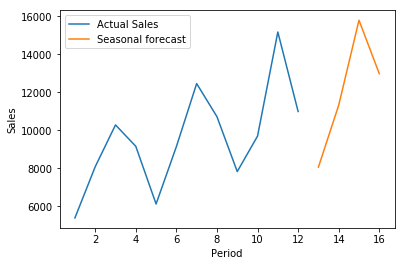

In [24]:
df2 = pd.DataFrame(
        {"Seasonal forecast" : predict},
        index = range(13,17))
df2.head(16)

result = pd.concat([df, df2], axis=1, sort=False)
ax = result.plot(kind='line')
ax.set_xlabel("Period")
ax.set_ylabel("Sales")
plt.show()